## [웹크롤링 _ 나무위키 사이트 분석 및 시각화]
### <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

[웹크롤링 라이브러리 사용하기]
- 파이썬에서는 BeautifulSoup와 requests 라는 라이브러리로 웹 크롤러를 만들 수 있음
- requests는 특정 url로부터 html 문서를 가져오는 작업을 수행
- 나무위키와 같은 페이지는 html 문서가 javascript로 동적 로딩되는 경우가 있음
- requests 대신 셀레니움(selenium) 라이브러리를 이용해 크롬 브라우저로 동적 웹크롤링 수행
- selenium은 웹 브라우저를 자동으로 구동해주는 라이브러리
- selenium을 사용하기 위해 크롬 드라이버를 이용해 크롬 브라우저 자동으로 구동 => 크롬드라이버 필요

### [BeautifulSoup와 selenium을 이용한 웹 크롤링]
- anaconda prompt 혹은 terminal 에서 아래와 같은 패키지들을 설치
- pip install selenium
- pip install beautifulsoup4

### [크롬 브라우저 업데이트 및 크롬 드라이버 설치]
- 크롬 브라우저 설정해서 최신 버전으로 업데이트
- 크롬 드라이버 사이트에서 브라우저 버전에 맞는 드라이버 다운로드
    - https://chromedriver.chromium.org/downloads
- chromedriver.exe 파일을 노트북 파일 경로에 이동 



In [1]:
!pip install selenium

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### BeautifulSoup의 select() VS find_all()
- html 의 특정 요소 선택
- select, select_one 의 경우 css 선택자를 이용하는 것처럼 사용 가능
- select의 경우 후손이나 자손 요소를 css처럼 선택 가능
- 예) soup.select("dl>dt>a")
- find_all, find의 경우 하나의 태그(name="table")나 하나의 클래스(class="tables")를 선택
- find 의 경우 후손이나 자손 요소를 직접 선택할 수 없어 한 번 더 변수에 담든지 루프 문을 이용해야 함
- 예) find_all(class = "ah_roll"), find(name="table")

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup
import re #정규식 표현을 위한 모듈 

In [4]:
#윈도우용 크롬 웹드라이버 실행 경로 (windows)지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)



#사이트의 html 구조에 기반하여 크롤링을 수행
source_url = "https://namu.wiki/RecentChanges" #크롤링할 사이트 주소를 정의
driver.get(source_url) #크롬 드라이버를 통해 url의 html 문서 가져옴


#영진씨방법
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
element = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME, "app")))

# #명진씨방법
# import time
# time.sleep(10)


req = driver.page_source #전체페이지 
print(req)

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link rel="stylesheet" type="text/css" href="/skins/senkawa/10.a1e48eb86746983c527d.css"><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" rel="canonical" href="https://namu.wiki/RecentChanges"><link data-n-head="1" rel="search" type="application/opensearchdescription+xml" title="나무위키" href="/opensearch.xml"><

In [5]:
soup = BeautifulSoup(req, "html.parser") #BeautifulSoup 의 soup로 가공 
soup

<html><head><link href="/skins/senkawa/6.4cd8c9c215a8ec226109.css" rel="stylesheet"/><link href="/skins/senkawa/3.6578e2190d7f10b0f082.css" rel="stylesheet"/><script async="" src="/cdn-cgi/bm/cv/669835187/api.js"></script><style type="text/css">.resize-observer[data-v-b329ee4c]{position:absolute;top:0;left:0;z-index:-1;width:100%;height:100%;border:none;background-color:transparent;pointer-events:none;display:block;overflow:hidden;opacity:0}.resize-observer[data-v-b329ee4c] object{display:block;position:absolute;top:0;left:0;height:100%;width:100%;overflow:hidden;pointer-events:none;z-index:-1}</style><link href="/skins/senkawa/10.a1e48eb86746983c527d.css" rel="stylesheet" type="text/css"/><script charset="utf-8" src="/skins/senkawa/10.a1e48eb86746983c527d.js"></script><title>최근 변경내역 - 나무위키</title><link data-n-head="1" href="https://namu.wiki/RecentChanges" rel="canonical"/><link data-n-head="1" href="/opensearch.xml" rel="search" title="나무위키" type="application/opensearchdescription+xm

In [6]:
contents_table = soup.find(name="table") #find 함수를 이용해 태그명이 table인 것을 찾기
table_body = contents_table.find(name= "tbody") #table 안 tbody 태그인 것 찾기
table_rows = table_body.find_all(name="tr") #table tbody 안 tr태그인 것 찾기 => [ ]의 요소로 담김 
#table_body
table_rows[0]


<tr class="" data-v-17dde2e0=""><td data-v-17dde2e0=""><a data-v-17dde2e0="" href="/w/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91">약사사 삼층석탑</a> <a data-v-17dde2e0="" href="/history/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91">[역사]</a> <a data-v-17dde2e0="" href="/diff/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91?rev=6&amp;oldrev=5">[비교]</a> <a data-v-17dde2e0="" href="/discuss/%EC%95%BD%EC%82%AC%EC%82%AC%20%EC%82%BC%EC%B8%B5%EC%84%9D%ED%83%91">[토론]</a> <span data-v-17dde2e0="">(<span class="KqOjPCWR" data-v-17dde2e0="" data-v-6cbb5b59="">+13</span>)</span></td> <td data-v-17dde2e0=""><div class="v-popover" data-v-17dde2e0="" data-v-1de7cf8c=""><div aria-describedby="popover_csnajhswom" class="trigger" style="display: inline-block;"><a class="zypMHhwu" data-v-1de7cf8c="">cometleeko</a> </div> </div> <!-- --></td> <td data-v-17dde2e0=""><time data-v-17dde2e0="" datetime="2022-01-25T05:04:44.000Z">2022-01-25 14:04:44</tim

In [7]:
len(table_rows)

107

### [페이지 링크주소 리스트 가져오기]

In [8]:
#특성 속성 값을 추출
page_url_base = "https://namu.wiki" #베이스 url 정의
page_urls = [] # href 속성값을 담기 위한 빈 리스트  

for i in range(0, len(table_rows)): #table_rows의 길이만큼 반복
    first_td = table_rows[i].find_all('td')[0] #td가 3개 있는데 0번째에 원하는 href 가 있음 
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        #page_url = page_url_base + td_url[0].get('href') #나무위키주소+get() 태그가 가지고 있는 속성 추출 
        page_url = page_url_base + td_url[0].attrs["href"] #attrs[]는 딕셔너리 형태로 속성명과 속성값을 불러옴 
        if "png" not in page_url:
            page_urls.append(page_url)
          
        
page_urls = list(set(page_urls)) #중복 url 제거
for page in page_urls[:3]:
    print(page)

https://namu.wiki/w/%EA%B9%80%EC%95%A0%EA%B2%BD
https://namu.wiki/w/%EC%97%B0%EC%9A%B0(%EC%9C%A0%ED%8A%9C%EB%B2%84)
https://namu.wiki/w/%EC%97%90%ED%8E%A8%EC%BD%94%EB%A6%AC%EC%95%84/%EB%B9%84%ED%8C%90


### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [9]:
page_urls

['https://namu.wiki/w/%EA%B9%80%EC%95%A0%EA%B2%BD',
 'https://namu.wiki/w/%EC%97%B0%EC%9A%B0(%EC%9C%A0%ED%8A%9C%EB%B2%84)',
 'https://namu.wiki/w/%EC%97%90%ED%8E%A8%EC%BD%94%EB%A6%AC%EC%95%84/%EB%B9%84%ED%8C%90',
 'https://namu.wiki/w/9%EC%9B%94%208%EC%9D%BC',
 'https://namu.wiki/w/%ED%86%B0(Talking%20Tom%20and%20Friends)',
 'https://namu.wiki/w/%ED%95%9C%EA%B5%AD%EC%9E%A5%ED%95%99%EC%9E%AC%EB%8B%A8',
 'https://namu.wiki/w/Day%20R%20Survival',
 'https://namu.wiki/w/%EC%96%B4%EC%84%A4%ED%8A%B8%20%EB%A6%B4%EB%A6%AC/%EB%AF%B8%EB%94%94%EC%96%B4%20%EB%AF%B9%EC%8A%A4',
 'https://namu.wiki/w/SBS%20%EC%97%B0%EA%B8%B0%EB%8C%80%EC%83%81/1993~2000%EB%85%84',
 'https://namu.wiki/w/%ED%8B%80:%EB%91%90%EC%82%B0%20%EB%B2%A0%EC%96%B4%EC%8A%A4/%EA%B0%84%EB%9E%B5(%EC%99%B8%EC%95%BC%EC%88%98)',
 'https://namu.wiki/w/%EA%B0%84%ED%98%B8%EC%82%AC',
 'https://namu.wiki/w/%EC%8A%A4%EC%B9%B4%EB%84%88',
 'https://namu.wiki/w/%EC%9E%90%EC%A0%84%EA%B1%B0%EB%8F%84%EB%A1%9C/%EB%AA%A9%EB%A1%9D',
 'https://namu.wiki/

### [각 링크 페이지내 텍스트 구조를 확인하여 제목, 카테고리, 내용 출력]

In [10]:
# 윈도우용 크롬 웹드라이버 실행경로(windows) 지정
excutable_path = "chromedriver.exe"
driver = webdriver.Chrome(executable_path = excutable_path)
#크롬 드라이버를 통해 page_urls[0]번째 사이트의 html 문서 가져옴 
driver.get(page_urls[0]) #page_urls[0]번쨰의 정보를 가져옴
req=driver.page_source #페이지 소스를 req에 저장 
soup = BeautifulSoup(req,'html.parser') #html.parser로 파싱
contents_table=soup.find(name="article") #article 태그 하나만 불러오기 

#타이틀 추출
title = contents_table.find_all('h1')[0]

#카테고리 추출
category = contents_table.find_all('ul')[0]
#contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"}) # div 태그 중 class 속성값이 wiki-paragraph
#div 태그 중 클래스이름이 wiki-paragraph인 요소 모두 추출
content_paragraphs = contents_table.select("div.wiki-paragraph") 


#내용으로 추출한 리스트를 하나의 문자열로 전처리
content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성 
for paragraphs in content_paragraphs: # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    content_corpus_list.append(paragraphs.text) #가져온 결과 태그 중 텍스트만 추출하여 content_corpus_list에 추가
content_corpus=" ".join(content_corpus_list) # "텍스트".join(리스트명)=> 리스트의 요소를 "텍스트"로 구분하여 하나의 문자열로 만듦

print(title.text) #제목출력 
print("\n")
print(category.text) #카테고리 출력
print("\n")
print(content_corpus) #내용출력

#크롤링에 사용한 브라우저를 종료합니다
driver.close()
    

김애경 


한국 여배우1950년 출생서울특별시 출신 인물1968년 데뷔


  이름  김애경   생년월일  1950년 2월 12일(71세)   출생지  서울특별시   학력  중앙여자중학교중앙여자고등학교동덕여자대학교 국어국문학과 중퇴  가족 관계  남편: 이찬호  데뷔  1968년  1. 개요2. 출연 작품2.1. 드라마/시트콤2.2. 영화2.3. 방송활동 대한민국의 배우.1968년에 연극 활동으로 먼저 데뷔했으며, 이듬해에는 MBC 1기 공채 탤런트로 연예계에 데뷔했다. 1990년에는 KBS의 일일 연속극 인 서울뚝배기에서 '실례합니다~'라는 유행어로 일약 스타덤에 올랐으며 1993년에는 대추나무 사랑걸렸네에서 양국자 역을 맡은 적이 있다. 대중에게는 보통 주책바가지 중년 여성 캐릭터 연기로 잘 알려져있다. 2002~3년에는 일산에 있는 칼국수집을 운영한 적이 있다. 한때 고정으로 나오던 '브레인 서바이버'에서 칼국수타령을 했던 일화가 있었다.2004년에는 '시고도 떫고도 더러운 사랑'이라는 저서를 낸 적이 있으며 50대 후반에 2008년에는 5살 연하인 이찬호(와이어 아티스트)와 결혼했다. 수사반장  제1공화국 - 박마리아 서궁마마 어제, 그리고 내일  야망의 25시 아버지와 아들 백년 손님 야상곡 한강 두 형사 전원일기 - 상곤의 아내 엄마의 방  남자의 계절 한지붕 세가족 -  혜정 사랑과 야망 - 홍조 모 원미동 사람들  모래성  조선왕조 오백년 한중록 - 정성왕후 사랑의 굴레 제2공화국 - 이현란단, 이 당시에는 실명으로 나오지 않고 '이 모 여인'으로 나왔다. 실명으로 나온 건 제3공화국이다. 배반의 장미 - 진 사장 서울뚝배기 - 윤마담 머슴아와 가이내  형 먼동  대추나무 사랑걸렸네 - 양국자 제3공화국 - 이현란 갈채 우리들의 넝쿨 길  형제의 강 파랑새는 있다  순풍산부인과 대왕의 길 - 숙의 문씨의 어머니 사랑과 성공  학교 파도 - 남수 모 마법의 성 - 김여사 반달곰 내 사랑 아버지와 아들  부모님 전상서 맨발의 사랑 - 김문자 거침없

### [각 링크 페이지 크롤링하여 제목, 카테고리, 내용 출력]

In [11]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

#for page_url in page_urls:
for i in range(10):
    # 윈도우용 크롬 웹드라이버 실행 경로 (Windows) 지정
    excutable_path = "chromedriver.exe"
    driver = webdriver.Chrome(executable_path=excutable_path)
    # 크롬 드라이버를 통해 page_urls[0]번째 사이트의 HTML 문서 가져옴
    #driver.get(page_url)  # page_urls[i],  page_url의 정보를 가져옴
    driver.get(page_urls[i])  # page_urls[i],  page_url의 정보를 가져옴
    req = driver.page_source # 페이지 소스를 req에 저장
    soup = BeautifulSoup(req, 'html.parser') # html.parser로 파싱
    contents_table = soup.find(name="article") #  불러온 소스에서 태그명이 article인 요소 하나만 추출

    ### 타이틀 추출
    title = contents_table.find_all('h1')[0] # 태그명이 h1인 모든 태그 추출, article h1
    if title is not None: #타이틀에 아무내용도 없으면 
        row_title = title.text.replace("\n", " ") #빈 칸으로 교체 
    else:
        row_title = ""
        
    ### 카테고리 추출
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0: # article ul 로 검색한 결과 여러 ul 결과가 나올 경우
        category = contents_table.find_all("ul")[0] # 제일 첫번째 article ul 을 category로 설정
    else:
        category = None
        
    if category is not None: #카테고리가 비어 있으면
        row_category = category.text.replace("\n", " ") #빈 칸으로 교체
    else:
        row_category = ""

    ### 내용 추출
    #contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})  
    #div  태그 중  class 속성값이  wiki-paragraph인 요소를 추출
    content_paragraphs = contents_table.select("div.wiki-paragraph")  
    #  내용으로 추출한 리스트를 하나의 문자열로 전처리
    content_corpus_list = [] # 내용 중 텍스트만 담을 빈 리스트 생성
    
    # content_paragraphs 리스트의 값을 순서대로 paragraphs에 대입
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")

    # 모든 정보를 하나의 데이터 프레임에 저장하기 위해서 시리즈 생성
    # 각 페이지의 정보를 추출하여 제목, 카테고리, 내용 순으로 행을 생성
    row = [row_title, row_category, "".join(content_corpus_list)]
    # 시리즈로 만듦
    series = pd.Series(row, index=df.columns)
    # 데이터 프레임에 시리즈를 추가, 한 페이지 당 하나의 행 추가
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [12]:
df

,title,category,content_text
0,김애경,한국 여배우1950년 출생서울특별시 출신 인물1968년 데뷔,이름 김애경 생년월일 1950년 2월 12일(71세) 출생지 서울특별시 학력...
1,연우(유튜버),유튜버뷰티 크리에이터1996년 출생안동 권씨서울과학기술대학교 출신,본명권연우본관안동 권씨(安東 權氏)출생1996년 8월 24일 (25세) 경기도신체1...
2,에펨코리아/비판,에펨코리아커뮤니티별 비판다중 합의/134,로그인 후 편집 가능한 문서입니다. 상위 문서: 에펨코리아 에펨코리아관련 ...
3,9월 8일,9월,날짜 이동란9월 7일전날←전달 9월 8일다음날→다음달9월 9일8월 8일10월 8일◀...
4,톰(Talking Tom and Friends),애니메이션 캐릭터,1. 개요2. 특징3. 다른 캐릭터들과의 관계4. 기타5. 평행우주 톰Talking...
5,한국장학재단,2009년 설립대한민국의 공공기관장학제도준정부기관특수법인,대한민국의 공공기관 [ 공기업 ]시장형 공기업산업통상자원부강원랜드한국가스공사한국...
6,Day R Survival,Day R Survival,"Day R Survival개발사/유통사tltGames플랫폼안드로이드, IOS장르생존..."
7,어설트 릴리/미디어 믹스,어설트 릴리작품별 미디어 믹스,상위 문서: 어설트 릴리1. 연극1.1. 어설트 릴리 x 사립 루도비코 여학원...
8,SBS 연기대상/1993~2000년,SBS 연기대상,상위 문서: SBS 연기대상1. 1993년2. 1994년3. 1995년4. 1...
9,틀:두산 베어스/간략(외야수),둘러보기 틀/두산 베어스두산 베어스,두산 베어스2022 시즌 외야수두산 베어스2022 시즌 외야수 [ 펼치기 · 접기...


# [명사만을 추출하여 워드 클라우드 그리기]

## [코엔엘파이(konlpy)를 이용한 형태소 분석]

- 품사란 단어를 기능, 형태, 의미에 따라 나눈 갈래
- 우리나라의 학교 문법에서는 명사, 대명사, 수사, 조사, 동사, 형용사, 관형사, 부사, 감탄사의 아홉 가지로 분류

### [형태소 분석과 품사 태깅]

- 형태소: 더 이상 분리를 할 수 없는 의미를 갖는 최소 단어를 의미
- 형태소 분석: 형태소를 비롯하여, 어근, 접두사/접미사, 품사 등 다양한 언어적 속성의 구조를 파악하는 것
- 품사 태깅: 형태소와 품사를 매칭시키는 것 

### [빈도 분석: 문장 형태소 분석 - Konlpy]

- Konlpy: 파이썬 한국어 형태소 분석 라이브러리

#  <Step2. 키워드 추출> 

### [텍스트 데이터 전처리] 정규식을 사용하여 한글과 띄어쓰기만 가져오기
#### 파이썬 정규표현식(re) 사용법 -05. 주석, 치환, 분리

- 정규표현식: 컴파일 => re.compile, 컴파일을 미리 해 두고 이를 저장
- 정규표현식: 치환 => re.sub(pattern, repl, string, flags)


In [13]:
# 한글 코드 범위
# ㄱ ~ ㅎ : 0x3131 ~ 0x314e
# ㅏ~ ㅣ : 0x314f ~ 0x3163
# 가~ 핳: 0xac00 ~ 0xd7a3
# [^ㄱ- l가~ 힣+ ] 한글과 띄어쓰기의 정규식 패턴

#사용자 정의 함수 선언
def text_cleaning(text):
    #한글과 띄어쓰기를 제외한 모든 글자 패턴을 지정하여 hangul로 정의
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+') # ^ 있으면 한글만 나옴 . ^ 없으면 한글을 지움 
    result=hangul.sub(' ', text) #한글과 띄어쓰기를 제외한 모든 글자 패턴을 ''빈 문자로 치환
    return result
    

In [14]:
df['title'][0]

'김애경 '

In [15]:
df['content_text'][0]

" 이름 김애경  생년월일 1950년 2월 12일(71세)  출생지 서울특별시  학력 중앙여자중학교중앙여자고등학교동덕여자대학교 국어국문학과 중퇴 가족 관계 남편: 이찬호 데뷔 1968년 1. 개요2. 출연 작품2.1. 드라마/시트콤2.2. 영화2.3. 방송활동대한민국의 배우.1968년에 연극 활동으로 먼저 데뷔했으며, 이듬해에는 MBC 1기 공채 탤런트로 연예계에 데뷔했다. 1990년에는 KBS의 일일 연속극 인 서울뚝배기에서 '실례합니다~'라는 유행어로 일약 스타덤에 올랐으며 1993년에는 대추나무 사랑걸렸네에서 양국자 역을 맡은 적이 있다. 대중에게는 보통 주책바가지 중년 여성 캐릭터 연기로 잘 알려져있다. 2002~3년에는 일산에 있는 칼국수집을 운영한 적이 있다. 한때 고정으로 나오던 '브레인 서바이버'에서 칼국수타령을 했던 일화가 있었다.2004년에는 '시고도 떫고도 더러운 사랑'이라는 저서를 낸 적이 있으며 50대 후반에 2008년에는 5살 연하인 이찬호(와이어 아티스트)와 결혼했다.수사반장 제1공화국 - 박마리아서궁마마어제, 그리고 내일 야망의 25시아버지와 아들백년 손님야상곡한강두 형사전원일기 - 상곤의 아내엄마의 방 남자의 계절한지붕 세가족 -  혜정사랑과 야망 - 홍조 모원미동 사람들 모래성 조선왕조 오백년 한중록 - 정성왕후사랑의 굴레제2공화국 - 이현란단, 이 당시에는 실명으로 나오지 않고 '이 모 여인'으로 나왔다. 실명으로 나온 건 제3공화국이다.배반의 장미 - 진 사장서울뚝배기 - 윤마담머슴아와 가이내 형먼동 대추나무 사랑걸렸네 - 양국자제3공화국 - 이현란갈채우리들의 넝쿨길 형제의 강파랑새는 있다 순풍산부인과대왕의 길 - 숙의 문씨의 어머니사랑과 성공 학교파도 - 남수 모마법의 성 - 김여사반달곰 내 사랑아버지와 아들 부모님 전상서맨발의 사랑 - 김문자거침없이 하이킥 - 영숙식객 - 조 여사하트 투 하트 아제 아제 바라아제 - 순녀 모해피투게더 쟁반노래방 - 2002년 11월 14일(54회)스펀지 - 2006년 11월 4일위기탈출 

In [16]:
print(text_cleaning(df['title'][0]))

김애경 


In [17]:
print(text_cleaning(df['content_text'][0]))

 이름 김애경 생년월일 년 월 일 세 출생지 서울특별시 학력 중앙여자중학교중앙여자고등학교동덕여자대학교 국어국문학과 중퇴 가족 관계 남편 이찬호 데뷔 년 개요 출연 작품 드라마 시트콤 영화 방송활동대한민국의 배우 년에 연극 활동으로 먼저 데뷔했으며 이듬해에는 기 공채 탤런트로 연예계에 데뷔했다 년에는 의 일일 연속극 인 서울뚝배기에서 실례합니다 라는 유행어로 일약 스타덤에 올랐으며 년에는 대추나무 사랑걸렸네에서 양국자 역을 맡은 적이 있다 대중에게는 보통 주책바가지 중년 여성 캐릭터 연기로 잘 알려져있다 년에는 일산에 있는 칼국수집을 운영한 적이 있다 한때 고정으로 나오던 브레인 서바이버 에서 칼국수타령을 했던 일화가 있었다 년에는 시고도 떫고도 더러운 사랑 이라는 저서를 낸 적이 있으며 대 후반에 년에는 살 연하인 이찬호 와이어 아티스트 와 결혼했다 수사반장 제 공화국 박마리아서궁마마어제 그리고 내일 야망의 시아버지와 아들백년 손님야상곡한강두 형사전원일기 상곤의 아내엄마의 방 남자의 계절한지붕 세가족 혜정사랑과 야망 홍조 모원미동 사람들 모래성 조선왕조 오백년 한중록 정성왕후사랑의 굴레제 공화국 이현란단 이 당시에는 실명으로 나오지 않고 이 모 여인 으로 나왔다 실명으로 나온 건 제 공화국이다 배반의 장미 진 사장서울뚝배기 윤마담머슴아와 가이내 형먼동 대추나무 사랑걸렸네 양국자제 공화국 이현란갈채우리들의 넝쿨길 형제의 강파랑새는 있다 순풍산부인과대왕의 길 숙의 문씨의 어머니사랑과 성공 학교파도 남수 모마법의 성 김여사반달곰 내 사랑아버지와 아들 부모님 전상서맨발의 사랑 김문자거침없이 하이킥 영숙식객 조 여사하트 투 하트 아제 아제 바라아제 순녀 모해피투게더 쟁반노래방 년 월 일 회 스펀지 년 월 일위기탈출 넘버원 대 년 월 일 회 라디오 스타 년 월 일 회 


In [18]:
# 각 피처마다 데이터 전처리를 적용
df['title'] = df['title'].apply(lambda x: text_cleaning(x)) 
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,김애경,한국 여배우 년 출생서울특별시 출신 인물 년 데뷔,이름 김애경 생년월일 년 월 일 세 출생지 서울특별시 학력 중앙여자중학교중앙여자고...
1,연우 유튜버,유튜버뷰티 크리에이터 년 출생안동 권씨서울과학기술대학교 출신,본명권연우본관안동 권씨 출생 년 월 일 세 경기도신체 형학력서울과학기술대학교 조형대...
2,에펨코리아 비판,에펨코리아커뮤니티별 비판다중 합의,로그인 후 편집 가능한 문서입니다 상위 문서 에펨코리아 에펨코리아관련 문서특징 비...
3,월 일,월,날짜 이동란 월 일전날 전달 월 일다음날 다음달 월 일 월 일 월 일 월 일월화수목...
4,톰,애니메이션 캐릭터,개요 특징 다른 캐릭터들과의 관계 기타 평행우주 톰 주인공 고양이인데 말을 할 수...


### [말뭉치 만들기]

In [19]:
# 각 피처마다 말뭉치를 생성
df['title'].tolist() #데이터프레임 타이틀 시리즈를 리스트로 만들기 


['김애경 ',
 '연우 유튜버 ',
 '에펨코리아 비판 ',
 ' 월 일 ',
 '톰 ',
 '한국장학재단 ',
 ' ',
 '어설트 릴리 미디어 믹스 ',
 ' 연기대상 년 ',
 '틀 두산 베어스 간략 외야수 ']

In [20]:
#각 피처마다 말뭉치(문자열)를 생성 
#문자열로 변환 "".join()
"".join(df['title'].tolist())

title_corpus = "".join(df['title'].tolist()) #데이터프레임 title 시리즈를 -> 리스트로 변환 -> 문자열로 변환
category_corpus= "".join(df['category'].tolist())
content_corpus= "".join(df['content_text'].tolist())

print(title_corpus)

김애경 연우 유튜버 에펨코리아 비판  월 일 톰 한국장학재단  어설트 릴리 미디어 믹스  연기대상 년 틀 두산 베어스 간략 외야수 


In [21]:
!pip install konlpy

In [22]:
import konlpy #konlpy : 한글 형태소 분석하는 라이브러리

In [23]:
!pip install pytagcloud pygame simplejson

In [24]:
import pytagcloud 

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [25]:
#konlpy의 형태소 분석기로 명사 단위의 키워드를 추출

from konlpy.tag import Okt
from collections import Counter 

nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus) # nouns() 함수를 이용하여 content_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

In [26]:
count #딕셔너리 형태 {키: 값, 키:값,...}

Counter({'이름': 24,
         '김애경': 1,
         '생년': 1,
         '월일': 1,
         '년': 320,
         '월': 126,
         '일': 133,
         '세': 7,
         '출생지': 1,
         '서울특별시': 4,
         '학력': 3,
         '중앙': 16,
         '여자': 47,
         '중학교': 1,
         '고등학교': 5,
         '동덕여자대': 1,
         '학교': 51,
         '국어': 2,
         '국문학': 3,
         '중퇴': 1,
         '가족': 21,
         '관계': 17,
         '남편': 8,
         '이찬호': 2,
         '데뷔': 7,
         '개요': 7,
         '출연': 29,
         '작품': 9,
         '드라마': 9,
         '시트콤': 9,
         '영화': 4,
         '방송': 28,
         '활동': 14,
         '대한민국': 18,
         '배우': 16,
         '연극': 27,
         '먼저': 24,
         '이듬해': 2,
         '기': 17,
         '공채': 2,
         '탤런트': 2,
         '연예계': 2,
         '의': 74,
         '일일': 3,
         '연속극': 1,
         '인': 35,
         '뚝배기': 2,
         '실례': 2,
         '유행어': 2,
         '일약': 1,
         '스타덤': 3,
         '대추나무': 2,
         '사랑': 11,
    

### [키워드 가다듬기]

In [27]:
# 한글자 키워드를 제거 후 내림차순 정렬
# x 는 키, count[x] 값으로 키의 값이 2 이상일 경우만 remove_char_counter 에 저장 
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기
print(remove_char_counter)

Counter({'한국': 413, '리리': 297, '문서': 294, '유유': 293, '이전': 278, '문단': 265, '역사': 262, '자신': 239, '경우': 195, '릴리': 191, '때문': 182, '댓글': 156, '펨코': 155, '상환': 143, '기간': 127, '사람': 124, '혐오': 123, '유저': 118, '대해': 115, '다른': 114, '퀘스트': 114, '휴지': 110, '토다': 108, '대출': 107, '해당': 106, '연구원': 100, '신청': 100, '사이트': 99, '공격': 98, '지원': 98, '진흥': 98, '소득': 94, '문제': 93, '정치': 91, '또한': 90, '카에데': 90, '캠프': 87, '여성': 85, '장학금': 85, '사용': 83, '대한': 82, '정도': 82, '아이템': 82, '장학재단': 81, '전투': 79, '재단': 78, '학자금': 78, '본인': 77, '패스': 77, '생각': 76, '사치': 75, '모두': 74, '마이': 74, '비코': 73, '성향': 71, '사실': 71, '관련': 70, '포텐': 70, '레기온': 70, '학자금대출': 69, '방사': 69, '어설트': 69, '연기': 67, '학원': 67, '시작': 66, '나기': 64, '가지': 63, '대상': 62, '확인': 62, '기술': 62, '내용': 60, '공단': 59, '학생': 59, '학기': 59, '코리아': 58, '논란': 58, '다시': 58, '토츠': 58, '이유': 57, '모습': 57, '기준': 57, '전술': 57, '후미': 56, '커뮤니티': 55, '이후': 55, '비판': 54, '갤러리': 53, '시간': 53, '마기': 53, '가장': 52, '다음': 52, '학교': 51, '에펨': 51, '노인': 51, '이상': 

### [불용어 제거]
- 실질적인 의미가 없는 키워드 처리,
- 관사나 접속사 등 실질적인 의미가 없으면서 동시에 의미적인 독립을 할 수 없는 품사 제거 
- 한국어 약식 불용어 사전 예시 파일 -출처 (https://www.ranks.nl/stopwords/korean)
- 인터넷 검색 시 검색 용어로 사용하지 않는 단어, 관사, 전치사, 조사, 접속사 등은 검색 색인 단어로 의미가 없는 단어
- 그러나, 각 검색 엔진마다 그 내용은 다를 수 있음

In [28]:
korean_stopwords_path = "korean_stopwords.txt" #불용어 사전 텍스트파일 경로

with open(korean_stopwords_path, encoding = 'utf8') as f: #불용어 텍스트 파일을 열어 f로 치환
    stopwords = f.readlines() # 파일로부터 불용어를 한줄씩 읽음 
stopwords = [x.strip() for x in stopwords] #리스트 생성. strip()  함수는 공백,줄바꿈,tab 등을 모두 제거 
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [29]:
#나무위키 페이지에 적용이 필요한 불용어 추가
namu_wiki_stopwords =['상위','문서','내용','누설','아래','해당','설명','표기','추가','모든',
                      '사용','매우','가장','줄거리','요소','상황', '편집', '틀', '경우', '때문', '모습', '정도', 
                      '이후', '사실', '생각', '인물', '이름','년월']

#기존의 불용어 텍스트 파일에 위의 namu_wiki_stopwords 리스트의 글자들을 추가 
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword) 

#키워드 데이터에서 불용어를 제거
remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기

print(remove_char_counter)

Counter({'한국': 413, '리리': 297, '문서': 294, '유유': 293, '이전': 278, '문단': 265, '역사': 262, '자신': 239, '경우': 195, '릴리': 191, '때문': 182, '댓글': 156, '펨코': 155, '상환': 143, '기간': 127, '사람': 124, '혐오': 123, '유저': 118, '대해': 115, '다른': 114, '퀘스트': 114, '휴지': 110, '토다': 108, '대출': 107, '해당': 106, '연구원': 100, '신청': 100, '사이트': 99, '공격': 98, '지원': 98, '진흥': 98, '소득': 94, '문제': 93, '정치': 91, '또한': 90, '카에데': 90, '캠프': 87, '여성': 85, '장학금': 85, '사용': 83, '대한': 82, '정도': 82, '아이템': 82, '장학재단': 81, '전투': 79, '재단': 78, '학자금': 78, '본인': 77, '패스': 77, '생각': 76, '사치': 75, '모두': 74, '마이': 74, '비코': 73, '성향': 71, '사실': 71, '관련': 70, '포텐': 70, '레기온': 70, '학자금대출': 69, '방사': 69, '어설트': 69, '연기': 67, '학원': 67, '시작': 66, '나기': 64, '가지': 63, '대상': 62, '확인': 62, '기술': 62, '내용': 60, '공단': 59, '학생': 59, '학기': 59, '코리아': 58, '논란': 58, '다시': 58, '토츠': 58, '이유': 57, '모습': 57, '기준': 57, '전술': 57, '후미': 56, '커뮤니티': 55, '이후': 55, '비판': 54, '갤러리': 53, '시간': 53, '마기': 53, '가장': 52, '다음': 52, '학교': 51, '에펨': 51, '노인': 51, '이상': 

# <Step3 . 시각화: 워드 클라우드 시각화하기>

## [pytagcloud 사용하기]

1.  아래 코드 실행을 위해 anaconda prompt 혹은 terminal 에서 아래와 같은 패키지들을 설치 
pip install pytagcloud pygame simplejson

2. 한글 폰트(예: NanumBarunGothic.ttf) 파일지정
Windows OS : {anaconda_path}\envs{env_name}\Lib\site-packages\pytagcloud\fonts
한글 나눔 글꼴 다운로드 http:\\hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf
파일을 옮긴 후 파이썬 가상환경을 재실행하여 주피터를 다시 실행

3. 위 방법으로 한글 폰트가 지정이 안될 경우 다음 방법으로 한글 폰트 지정
위의 경로에서 font.json 파일을 편집합니다
아래와 같은 코드를 추가하고 font.json 파일을 저장합니다

{
    "name": "NanumGothic",
       "ttf": "NanumGothic.ttf",
       "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
},

In [30]:
#pytagcloud 사용하기
import random
import pytagcloud
import webbrowser


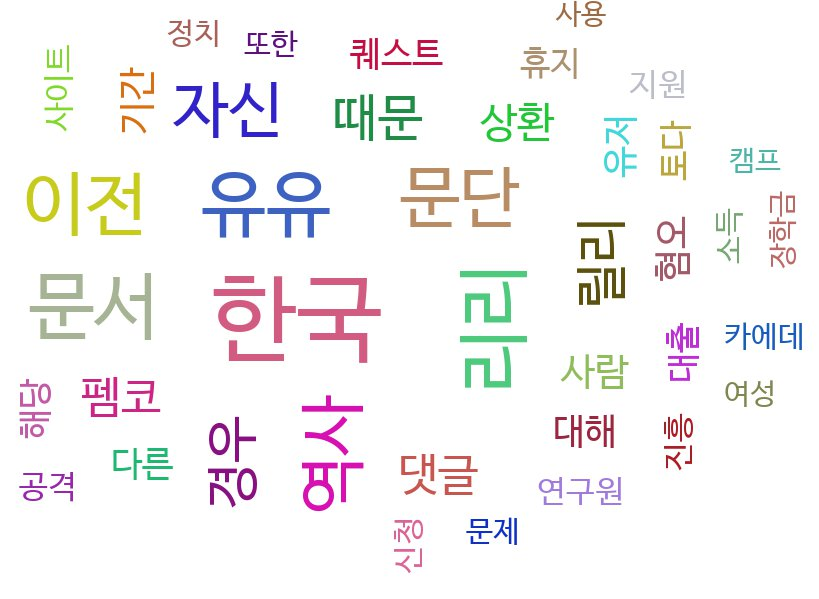

In [31]:
# 가장 출현 빈도수가 높은 40개의 단어를 선정
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

### [wordcloud 와 pillow 라이브러리를 이용한 워드 클라우드 시각화]
https://doitgrow.com/34
https://github.com/amueller/word_cloud

#### <1. wordcloud 설치>
콘다 프롬프트에서 아래 명령어 실행
conda install -c conda-forge wordcloud

#### <2. pillow 설치>
pip install pillow

In [32]:
!pip install pillow

In [33]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1999.5, 1999.5, -0.5)

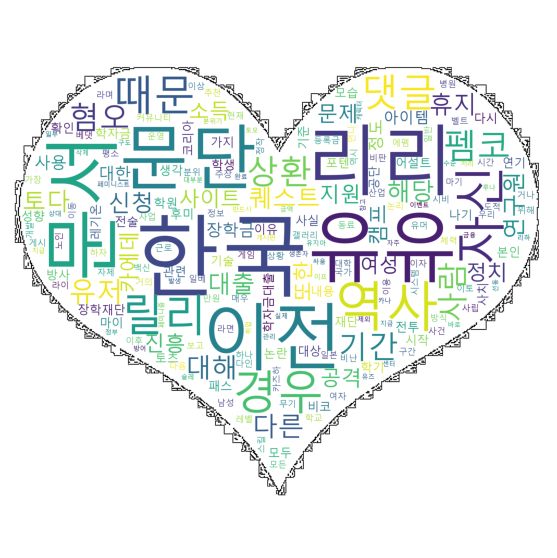

In [34]:
img = Image.open('heart.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white', contour_width=0.5,  contour_color ='black' )
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')


(-0.5, 811.5, 991.5, -0.5)

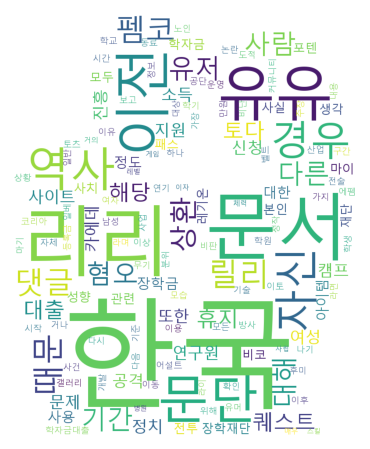

In [35]:
img = Image.open('personimage.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white')
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(8,8))
plt.imshow(gen)
plt.axis('off')


## 제목 키워드 시각화

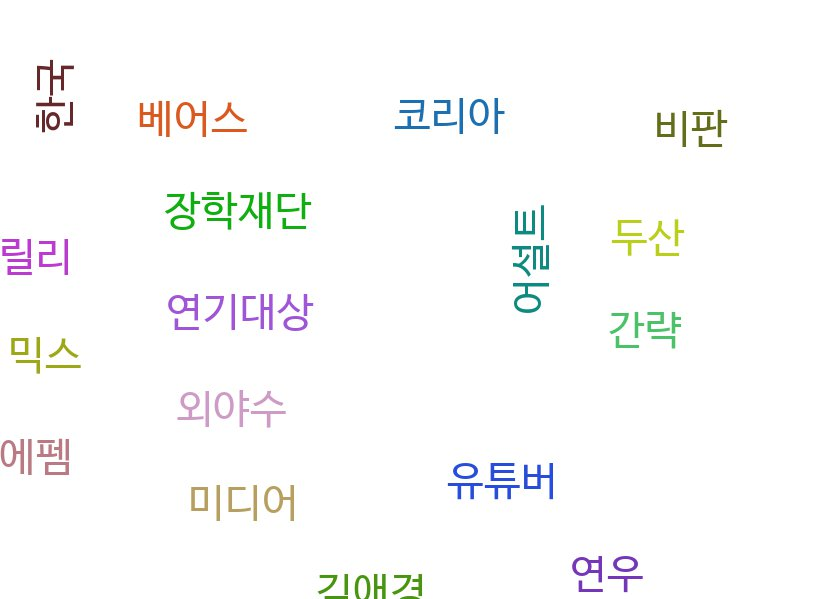

In [36]:
### 제목 키워드 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus) # nouns() 함수를 이용하여 title_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기


ranked_tags = remove_char_counter.most_common(40)
# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')





(-0.5, 899.5, 899.5, -0.5)

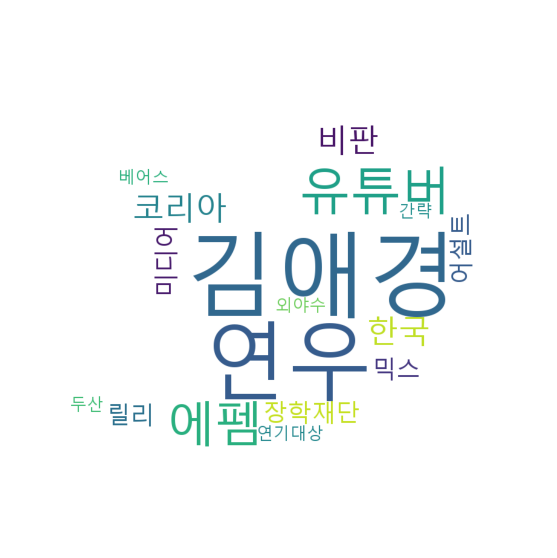

In [37]:
from PIL import Image
img = Image.open('bird.jpg')
img_array= np.array(img)


wc = WordCloud(font_path='malgun', width=1000, height=1000, scale=4.0, max_font_size=80, 
               mask= img_array, background_color='white' )
gen= wc.generate_from_frequencies(remove_char_counter)

plt.figure(figsize=(10,10))
plt.imshow(gen)
plt.axis('off')

## 카테고리 키워드 시각화

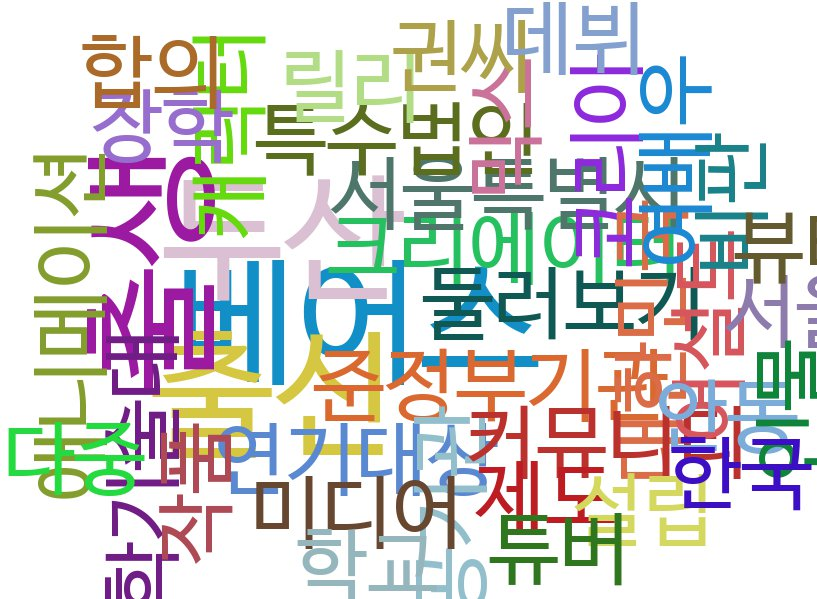

In [38]:
### 카테고리 키워드 시각화
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus) # nouns() 함수를 이용하여 title_corpus 문장 중 명사만을 추출
count = Counter(nouns) #각 명사의 빈도수 계산 

remove_char_counter = Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
remove_char_counter = Counter({x:count[x] for x in count if len(x) >1}) #글자길이가 2개이상인 것들만 담기


ranked_tags = remove_char_counter.most_common(40)
# pytagcloud 로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600),
fontname = 'NanumGothic', rectangular = False)

#생성한 이미지를 주피터 노트북상에서 출력
from IPython.display import Image
Image(filename = 'wordcloud.jpg')

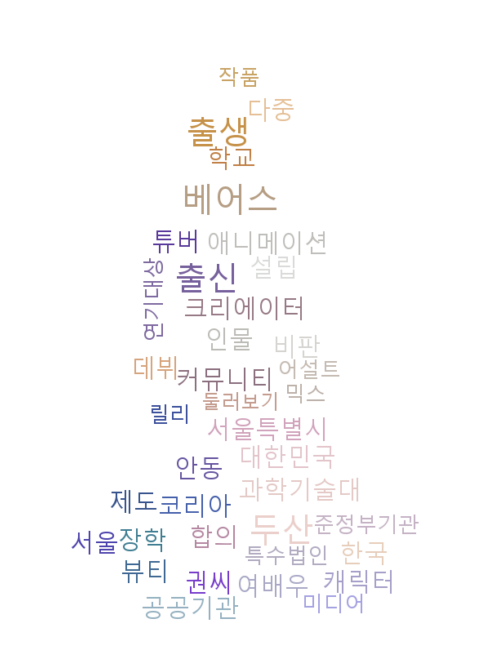

In [39]:
from PIL import Image
alice_coloring=np.array(Image.open("alice_img.png"))
wc=WordCloud(font_path='malgun',background_color='white',max_words=2000,
             mask=alice_coloring, max_font_size=40,random_state=42,contour_color='black')
gen=wc.generate_from_frequencies(remove_char_counter)
from wordcloud import ImageColorGenerator
imge_colors=ImageColorGenerator(alice_coloring)
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=imge_colors),interpolation='bilinear')
plt.axis('off')
plt.show()